## Step 1: Prepare Project

Load libraries                                                         



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.grid_search import GridSearchCV

/home/mscuser/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/mscuser/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# Load dataset
boston = load_boston()

## Step 2: Define Problem

What is your task? What are your goals? What do you want to achieve?


The task of this project is to take and examine the boston dataset. Our goal is to observe the dataset and to apply a set of algorithms in order to achieve the best regression. After choosing the best accuracy value, we perform the needed predictions

## Step 3: Exploratory Analysis                                               

Understand your data: Take a “peek” of your data, answer basic questions about the dataset. Summarise your data. Explore descriptive statistics and visualisations.

In [3]:
# Creates pandas dataFrame
data = pd.DataFrame(data= np.c_[boston['data'], boston['target']], columns= boston['feature_names'].tolist() + ['target'])

In [4]:
# Dimensions of the dataset
data.shape

(506, 14)

In [5]:
# A peek of the data
data.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [6]:
# Statistical summary of all attributes
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# The class distribution (number of instances per class)
data.groupby('target').size()

target
5.0      2
5.6      1
6.3      1
7.0      2
7.2      3
7.4      1
7.5      1
8.1      1
8.3      2
8.4      2
8.5      2
8.7      1
8.8      2
9.5      1
9.6      1
9.7      1
10.2     3
10.4     2
10.5     2
10.8     1
10.9     2
11.0     1
11.3     1
11.5     1
11.7     2
11.8     2
11.9     2
12.0     1
12.1     1
12.3     1
        ..
35.2     1
35.4     2
36.0     1
36.1     1
36.2     2
36.4     1
36.5     1
37.0     1
37.2     1
37.3     1
37.6     1
37.9     1
38.7     1
39.8     1
41.3     1
41.7     1
42.3     1
42.8     1
43.1     1
43.5     1
43.8     1
44.0     1
44.8     1
45.4     1
46.0     1
46.7     1
48.3     1
48.5     1
48.8     1
50.0    16
Length: 229, dtype: int64

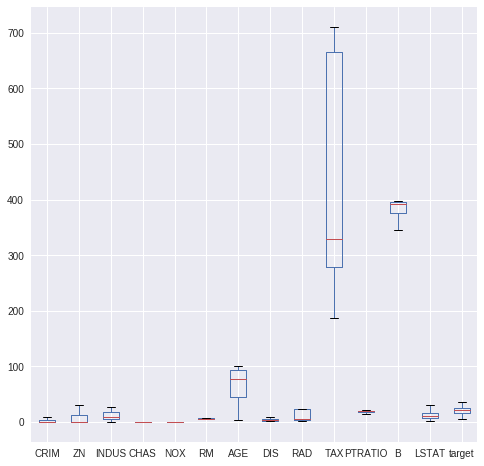

In [8]:
# Univariate plots to better understand each attribute
data.plot(kind='box', layout=(2,2), sharex=False, sharey=False, figsize=(8,8))
plt.show()

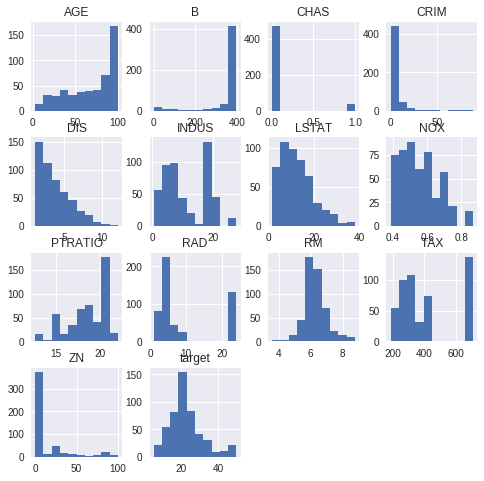

In [9]:
# Below we can see the histograms that show the distribution
data.hist(figsize=(8,8))
plt.show()

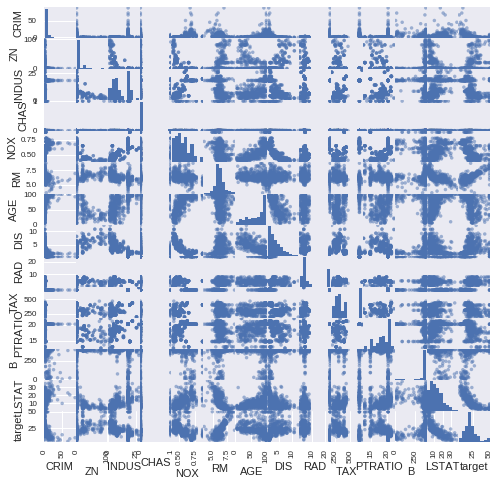

In [10]:
# Multivariate plots to better understand relationships between attributes
scatter_matrix(data, figsize=(8,8))
plt.show()

## Step 4: Prepare Data

In [11]:
# Data Wrangling
X_data = data.drop(['target'], axis = 1)

In [12]:
#Standarize the dataset 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_data)
print X_scaled

[[-0.41771335  0.28482986 -1.2879095  ..., -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41526932 -0.48772236 -0.59338101 ..., -0.30309415  0.44105193
  -0.49243937]
 [-0.41527165 -0.48772236 -0.59338101 ..., -0.30309415  0.39642699
  -1.2087274 ]
 ..., 
 [-0.41137448 -0.48772236  0.11573841 ...,  1.17646583  0.44105193
  -0.98304761]
 [-0.40568883 -0.48772236  0.11573841 ...,  1.17646583  0.4032249
  -0.86530163]
 [-0.41292893 -0.48772236  0.11573841 ...,  1.17646583  0.44105193
  -0.66905833]]


## Step 5: Feature Engineering

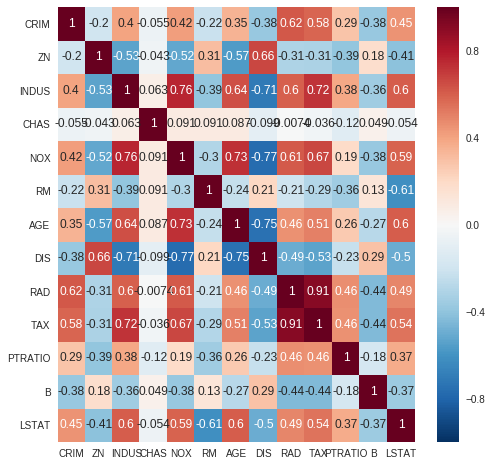

In [13]:
# Check for correlations of features
correlations = X_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlations, annot=True)
plt.show()

It is clear that there is high correlation between the features 'TAX' and 'RAD'. Nevertheless, this doesnt seem to affect the result.

## Step 6: Algorithm Selection                                            

Select a set of algorithms to apply, select evaluation metrics, and evaluate/compare algorithms.

In [14]:
# Create a list, with one item per algorithm. Each item has a name, and a classifier object.
models = []
models.append(('LR',      LinearRegression()))
models.append(('RIDGE',   Ridge()))
models.append(('LASSO',   Lasso()))
models.append(('ELASTIC', ElasticNet()))
models.append(('kNN',     KNeighborsRegressor()))
models.append(('DT',      DecisionTreeRegressor()))
models.append(('SVM',     SVR()))

In [15]:
# The scoring function to use
scoring = 'neg_mean_squared_error'

In [16]:
# We are going to evaluate all classifiers, and store results in two lists:
results = []
names   = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X_data, data.target, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%010s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))

        LR: -34.763092 (+/- 45.613653)
     RIDGE: -34.135235 (+/- 45.951208)
     LASSO: -34.468099 (+/- 27.886469)
   ELASTIC: -31.163471 (+/- 22.705972)
       kNN: -107.286839 (+/- 79.839529)
        DT: -37.080901 (+/- 30.235116)
       SVM: -91.047824 (+/- 71.101574)


In [17]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X_scaled, data.target, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%010s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))

        LR: -34.763092 (+/- 45.613653)
     RIDGE: -34.610802 (+/- 45.458388)
     LASSO: -37.862851 (+/- 40.589106)
   ELASTIC: -37.298298 (+/- 36.084789)
       kNN: -28.584596 (+/- 25.458626)
        DT: -40.013602 (+/- 33.744072)
       SVM: -38.586539 (+/- 38.008841)


The results after standarizing the dataset seem to be worst than the original data. it is obvious that the best algorithm for out dataset is KNN.

<IPython.core.display.Javascript object>


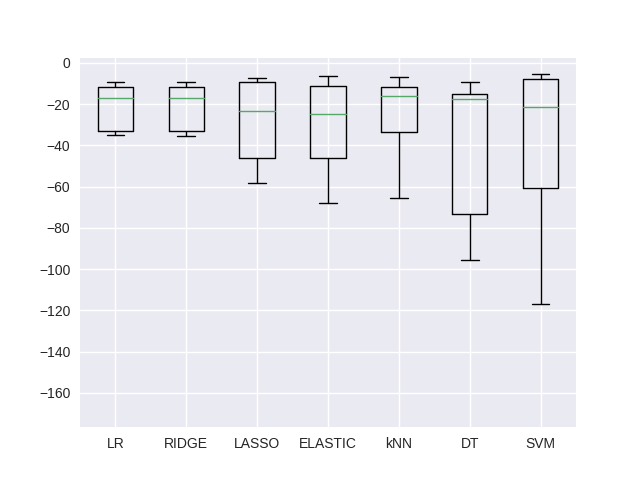

In [18]:
import matplotlib.pyplot as plt
%matplotlib notebook

plt.boxplot(results)
plt.xticks(list(range(1,len(names)+1)), names)
plt.show()

# Step 7: Model Training

In [19]:
knn = KNeighborsRegressor()

#Split data
X_train, X_validation, Y_train, Y_validation = train_test_split(X_data, data.target, test_size=0.20, random_state=7)
model = knn.fit(X_train, Y_train)
#Calculation of mean_squared_error
predictions = model.predict(X_validation)
mean_squared_error(predictions, Y_validation)

37.259050980392153

In [20]:
knn.get_params().keys()
param_grid = {"n_neighbors": [3,5, 10],
              "metric": ['manhattan', 'euclidean', 'chebyshev', 'minkowski'],
              "weights": ['uniform', 'distance'],
              "leaf_size": [10, 20, 30],
              "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']
             }

In [21]:
grid_search = GridSearchCV(knn, param_grid=param_grid)
grid = grid_search.fit(X_train, Y_train)
predictions = grid.predict(X_validation)
mean_squared_error(predictions, Y_validation)

29.941084711083217

Finally, we can see that grid gives us better parameters, so our model has been improved.